In [182]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn.tree import export_graphviz

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso

from scipy import interp
from itertools import cycle
import numpy as np
from numpy.linalg import norm

from sklearn import datasets
from sklearn import svm

from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [122]:
csv_fpath = os.path.expanduser('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
CarData = pd.read_csv(csv_fpath)
CarData.head()

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN


In [123]:
%store -r CarDataKnown

In [124]:
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0


In [125]:
%store -r citydataknown
citydataknown.head()

,Borough,Population,Injuries,proportion inj to pop
0,Bronx,1432132,45165,0.031537
1,Queens,2278906,79813,0.035023
2,Manhattan,1628701,46879,0.028783
3,Brooklyn,2582830,102527,0.039696
4,Staten Island,476179,12223,0.025669


In [126]:
CarDataKnown['ped_affected'] = CarData['NUMBER OF PEDESTRIANS KILLED'] + CarData['NUMBER OF PEDESTRIANS INJURED']
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0


In [127]:
CarDataKnown['ped_tf'] = CarData['NUMBER OF PEDESTRIANS KILLED'] + CarData['NUMBER OF PEDESTRIANS INJURED']
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0


In [128]:
borough_dummy = CarDataKnown.BOROUGH.str.get_dummies()

In [129]:
CarDataWDummies = pd.concat([CarDataKnown,borough_dummy],axis=1)
CarDataWDummies.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0,0,0,0,1,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0,0,1,0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0,0,0,0,1,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0,0,0,0,1,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0,1,0,0,0,0


In [130]:
value_counts = CarData["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = CarData[~CarData['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Human            946398
Unspecified      606315
Vehicular         74935
Environmental     38429
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


In [131]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()

In [132]:
cardata = pd.concat([CarDataWDummies,factor_dummy],axis=1)
cardata.head(5000)

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,...,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,QUEENS,1.0,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,BROOKLYN,2.0,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,QUEENS,1.0,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,QUEENS,1.0,40.765503,-73.863840,2.0,0.0,15.0,14.516667,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4996,MANHATTAN,3.0,40.756240,-73.991450,0.0,0.0,11.0,11.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0


In [14]:
for col in cardata.columns: 
    print(col)

BOROUGH
borough_num
LATITUDE
LONGITUDE
injuries_int
killed_int
time_int
time_num
inj_bin
killed_bin
number_affected
ped_affected
ped_tf
BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND
Environmental
Human
Unspecified
Vehicular


In [14]:
cardata.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,...,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,QUEENS,1.0,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,BROOKLYN,2.0,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,QUEENS,1.0,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [133]:
print(cardata.shape)

(1670603, 22)


In [134]:
del cardata['BOROUGH']
del cardata['borough_num']
cardata.head()

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [135]:
data = cardata.dropna()
#data = data[data.LONGITUDE !=0

In [136]:
data.shape

(1131462, 20)

In [168]:
data.PERSONS_TF.value_counts()

0    1065703
1      65759
Name: PERSONS_TF, dtype: int64

In [147]:
data.head(20)

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular,PERSONS_TF
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
9,40.688457,-73.982720,0.0,0.0,21.0,20.683333,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
13,40.892475,-73.854500,1.0,0.0,11.0,11.416667,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
14,40.852337,-73.863930,0.0,0.0,14.0,14.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
15,40.760600,-73.964340,0.0,0.0,17.0,16.600000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
16,40.719970,-73.992905,0.0,0.0,12.0,11.750000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [138]:
data.rename(columns={"time_num": "NUMTIME"})

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,NUMTIME,inj_bin,killed_bin,number_affected,ped_affected,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,40.785171,-73.973134,0.0,0.0,10.0,10.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1670613,40.772344,-73.952686,2.0,0.0,21.0,21.333333,1.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1670614,40.768802,-73.958360,0.0,0.0,8.0,8.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1670615,40.754348,-73.976972,1.0,0.0,3.0,2.916667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
X_feat = data[['LATITUDE',"LONGITUDE",'NUMTIME','BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','Environmental','Human','Unspecified','Vehicular']]
y = data['ped_tf']
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

dtc = MLPClassifier(verbose=True)
grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'max_iter': [100,200,500,1000,2000]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(20)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.31786295
Iteration 2, loss = 0.23273143
Iteration 3, loss = 0.23236361
Iteration 4, loss = 0.23217239
Iteration 5, loss = 0.23210474
Iteration 6, loss = 0.23204508
Iteration 7, loss = 0.23197679
Iteration 8, loss = 0.23192798
Iteration 9, loss = 0.23185470
Iteration 10, loss = 0.23182820
Iteration 11, loss = 0.23179455
Iteration 12, loss = 0.23174449
Iteration 13, loss = 0.23165905
Iteration 14, loss = 0.23171528
Iteration 15, loss = 0.23168611
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.29315150
Iteration 2, loss = 0.23346713
Iteration 3, loss = 0.23298956
Iteration 4, loss = 0.23270453
Iteration 5, loss = 0.23252783
Iteration 6, loss = 0.23242462
Iteration 7, loss = 0.23242080
Iteration 8, loss = 0.23231049
Iteration 9, loss = 0.23222891
Iteration 10, loss = 0.23216554
Iteration 11, loss = 0.23209864
Iteration 12, loss = 0.23206159
Iteration 13, loss = 0.23201682
Iteration 14, loss = 0.23195269


Iteration 5, loss = 0.23131551
Iteration 6, loss = 0.23051090
Iteration 7, loss = 0.23003534
Iteration 8, loss = 0.22955976
Iteration 9, loss = 0.22937530
Iteration 10, loss = 0.22912111
Iteration 11, loss = 0.22894669
Iteration 12, loss = 0.22888853
Iteration 13, loss = 0.22880829
Iteration 14, loss = 0.22875498
Iteration 15, loss = 0.22865405
Iteration 16, loss = 0.22858674
Iteration 17, loss = 0.22852498
Iteration 18, loss = 0.22842310
Iteration 19, loss = 0.22849495
Iteration 20, loss = 0.22836855
Iteration 21, loss = 0.22845477
Iteration 22, loss = 0.22843523
Iteration 23, loss = 0.22838078
Iteration 24, loss = 0.22834212
Iteration 25, loss = 0.22830176
Iteration 26, loss = 0.22824764
Iteration 27, loss = 0.22821813
Iteration 28, loss = 0.22827839
Iteration 29, loss = 0.22816046
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.28387897
Iteration 2, loss = 0.23326614
Iteration 3, loss = 0.23238665
Iteration 4, loss = 0.

Iteration 1, loss = 0.30207419
Iteration 2, loss = 0.23657366
Iteration 3, loss = 0.23588506
Iteration 4, loss = 0.23348886
Iteration 5, loss = 0.23288943
Iteration 6, loss = 0.23199308
Iteration 7, loss = 0.23067553
Iteration 8, loss = 0.23012055
Iteration 9, loss = 0.22992982
Iteration 10, loss = 0.22945995
Iteration 11, loss = 0.22927823
Iteration 12, loss = 0.22884637
Iteration 13, loss = 0.22882061
Iteration 14, loss = 0.22856532
Iteration 15, loss = 0.22843628
Iteration 16, loss = 0.22843931
Iteration 17, loss = 0.22847154
Iteration 18, loss = 0.22839453
Iteration 19, loss = 0.22827321
Iteration 20, loss = 0.22826899
Iteration 21, loss = 0.22813746
Iteration 22, loss = 0.22818558
Iteration 23, loss = 0.22815880
Iteration 24, loss = 0.22802374
Iteration 25, loss = 0.22801055
Iteration 26, loss = 0.22803487
Iteration 27, loss = 0.22805272
Iteration 28, loss = 0.22802000
Iteration 29, loss = 0.22803622
Iteration 30, loss = 0.22794674
Iteration 31, loss = 0.22796422
Iteration 32, los

KeyboardInterrupt: 

In [144]:
X = data.drop('PERSONS_TF',axis=1)
y = data['PERSONS_TF']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
negative = train_data[train_data.PERSONS_TF==0]
positive = train_data[train_data.PERSONS_TF==1]
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
upsampled = pd.concat([negative, pos_upsampled])
upsampled.PERSONS_TF.value_counts()

1    713970
0    713970
Name: PERSONS_TF, dtype: int64

In [143]:
def persons_to_binary(x):
    if x==0:
        return 0
    else:
        return 1
    
data['PERSONS_TF']=data['ped_tf'].apply(persons_to_binary)

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [145]:
pred = list(zip(data['time_num'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_TF']
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1065703, 1: 1065703})


In [148]:
data_predict = data[['time_num','MANHATTAN','QUEENS','BRONX','STATEN ISLAND','BROOKLYN','Human','Environmental','Vehicular','Unspecified']]

In [150]:
X_tot = data_predict
print("number of features: {0}".format(len(X_tot.columns)))
y = data['PERSONS_TF']

number of features: 10


In [151]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
# n_jobs parameters controls how many CPU cores you want to use; -1 for all
felr = RFECV(LinearRegression(), cv = 3, min_features_to_select = 1, n_jobs = 1)
# fit and automatically prune features
felr.fit(X_tot, y)

RFECV(cv=3,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=1, scoring=None, step=1, verbose=0)

In [152]:
print("features:\n{0}\ncoefs:\n{1}\n\navg R^2: {2:.5f}".format(X_tot.columns[felr.support_], 
                                                         felr.estimator_.coef_, felr.score(X_tot, y)))

features:
Index(['time_num', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND', 'BROOKLYN',
       'Human', 'Environmental', 'Vehicular', 'Unspecified'],
      dtype='object')
coefs:
[ 0.00122102  0.00519813 -0.00471267  0.01122777 -0.01862276  0.00690953
 -0.41852341 -0.38871865 -0.45382428 -0.41081865]

avg R^2: 0.01280


In [153]:
Xs = data_predict
y = data['PERSONS_TF']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [154]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=20)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.22010747
Iteration 2, loss = 0.21809738
Iteration 3, loss = 0.21760795
Iteration 4, loss = 0.21754740
Iteration 5, loss = 0.21734992
Iteration 6, loss = 0.21727130
Iteration 7, loss = 0.21722245
Iteration 8, loss = 0.21718592
Iteration 9, loss = 0.21714909
Iteration 10, loss = 0.21711595
Iteration 11, loss = 0.21706004
Iteration 12, loss = 0.21706908
Iteration 13, loss = 0.21705436
Iteration 14, loss = 0.21700582
Iteration 15, loss = 0.21698567
Iteration 16, loss = 0.21693858
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [156]:
print('MLP Scpore: ',mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())

MLP Scpore:  0.9421281259252385
Null accuracy on the test set:  0.058137017053112555


In [159]:
y_pred = mlp.predict(X_test)

print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Sensitivity/Recall (TPR):  0.011933718455457586
Precision (PPV):  0.6181102362204725
F1: 0.02341536167039523
Null accuracy on the test set:  0.058137017053112555
Accuracy is: 0.9421281259252385
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    213137
           1       0.62      0.01      0.02     13156

    accuracy                           0.94    226293
   macro avg       0.78      0.51      0.50    226293
weighted avg       0.92      0.94      0.92    226293



[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

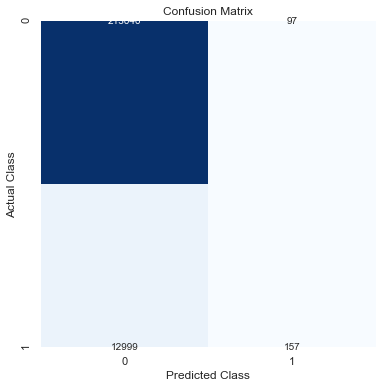

In [160]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

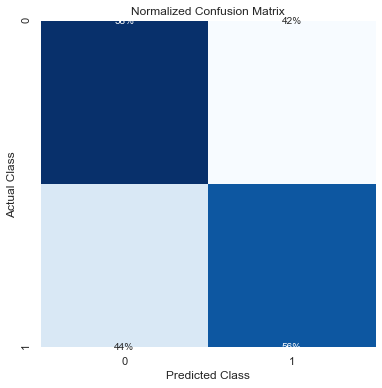

In [169]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

In [146]:
Xs = data[['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']]
y = data['PERSONS_TF']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [26]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=20)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.24234718
Iteration 2, loss = 0.23207078
Iteration 3, loss = 0.23190455
Iteration 4, loss = 0.23183232
Iteration 5, loss = 0.23178400
Iteration 6, loss = 0.23175833
Iteration 7, loss = 0.23169825
Iteration 8, loss = 0.23165583
Iteration 9, loss = 0.23166013
Iteration 10, loss = 0.23161545
Iteration 11, loss = 0.23160018
Iteration 12, loss = 0.23160540
Iteration 13, loss = 0.23156320
Iteration 14, loss = 0.23155387
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [27]:
print(mlp.score(X_test,y_test))

0.9417657638548254


In [30]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.060735418240953104


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

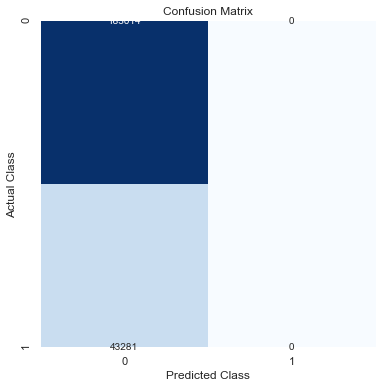

In [30]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [ ]:
logreg = LogisticReegression(solver='relu', random_state =1)

logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

score = logreg.score(X_test,y_test)
print(score)

In [ ]:
y_pred = model.predict(X_test)
print(mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

In [ ]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [116]:
Xs = CarDataKnown[['LATITUDE','LONGITUDE']]
y = CarDataKnown['ped_tf']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

Iteration 1, loss = 0.24305383
Iteration 2, loss = 0.23319632
Iteration 3, loss = 0.23295300
Iteration 4, loss = 0.23277961


Iteration 1, loss = 0.48729800
Iteration 2, loss = 0.48512855
Iteration 3, loss = 0.48481170
Iteration 4, loss = 0.48451123
Iteration 5, loss = 0.48432565
Iteration 6, loss = 0.48419093
Iteration 7, loss = 0.48397192
Iteration 8, loss = 0.48351258
Iteration 9, loss = 0.48314105
Iteration 10, loss = 0.48301860
Iteration 11, loss = 0.48298540
Iteration 12, loss = 0.48288096
Iteration 13, loss = 0.48285177
Iteration 14, loss = 0.48280568
Iteration 15, loss = 0.48278734
Iteration 16, loss = 0.48308274
Iteration 17, loss = 0.48276967
Iteration 18, loss = 0.48274739
Iteration 19, loss = 0.48273550
Iteration 20, loss = 0.48270607
Iteration 21, loss = 0.48268029
Iteration 22, loss = 0.48259644
Iteration 23, loss = 0.48259373
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

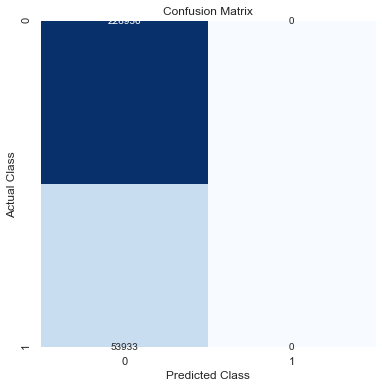

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25)
mlp.fit(X_train,np.ravel(y_train))

test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

Resampled Data

In [161]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .3)

In [163]:
mlp = MLPClassifier(hidden_layer_sizes = (200,200,200), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=100)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.67715355
Iteration 2, loss = 0.67445602
Iteration 3, loss = 0.67395785
Iteration 4, loss = 0.67373393
Iteration 5, loss = 0.67354452
Iteration 6, loss = 0.67343807
Iteration 7, loss = 0.67333711
Iteration 8, loss = 0.67327457
Iteration 9, loss = 0.67318909
Iteration 10, loss = 0.67313717
Iteration 11, loss = 0.67311530
Iteration 12, loss = 0.67308086
Iteration 13, loss = 0.67302390
Iteration 14, loss = 0.67297963
Iteration 15, loss = 0.67295247
Iteration 16, loss = 0.67289629
Iteration 17, loss = 0.67292046
Iteration 18, loss = 0.67287693
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [164]:
print('MLP Scpore: ',mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())

MLP Scpore:  0.5687965068452446
Null accuracy on the test set:  0.5003299855181711


In [165]:
y_pred = mlp.predict(X_test)

print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Sensitivity/Recall (TPR):  0.5564450084708148
Precision (PPV):  0.5708719619544826
F1: 0.5635661700110327
Null accuracy on the test set:  0.5003299855181711
Accuracy is: 0.5687965068452446
              precision    recall  f1-score   support

           0       0.57      0.58      0.57    319500
           1       0.57      0.56      0.56    319922

    accuracy                           0.57    639422
   macro avg       0.57      0.57      0.57    639422
weighted avg       0.57      0.57      0.57    639422



[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

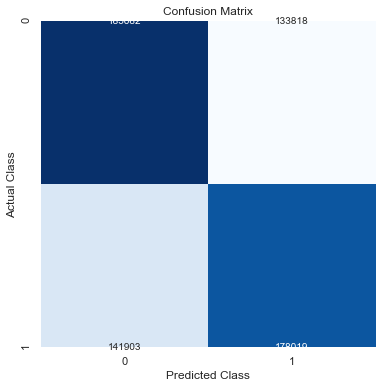

In [166]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

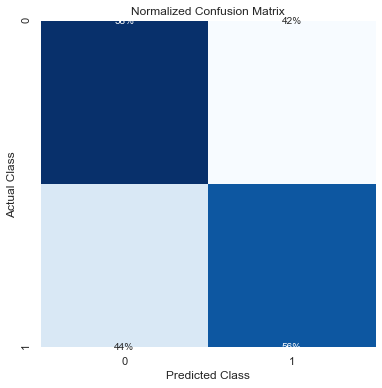

In [167]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

New Data: Biker, Motorist, Pedestrian

In [171]:
data.head()

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular,PERSONS_TF
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [172]:
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN


In [173]:
for col in CarData.columns:
    print(col)

CRASH DATE
CRASH TIME
BOROUGH
ZIP CODE
LATITUDE
LONGITUDE
LOCATION
ON STREET NAME
CROSS STREET NAME
OFF STREET NAME
NUMBER OF PERSONS INJURED
NUMBER OF PERSONS KILLED
NUMBER OF PEDESTRIANS INJURED
NUMBER OF PEDESTRIANS KILLED
NUMBER OF CYCLIST INJURED
NUMBER OF CYCLIST KILLED
NUMBER OF MOTORIST INJURED
NUMBER OF MOTORIST KILLED
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
CONTRIBUTING FACTOR VEHICLE 3
CONTRIBUTING FACTOR VEHICLE 4
CONTRIBUTING FACTOR VEHICLE 5
COLLISION_ID
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2
VEHICLE TYPE CODE 3
VEHICLE TYPE CODE 4
VEHICLE TYPE CODE 5


In [174]:
for col in CarDataKnown.columns:
    print(col)

BOROUGH
borough_num
LATITUDE
LONGITUDE
injuries_int
killed_int
time_int
time_num
inj_bin
killed_bin
number_affected
ped_affected
ped_tf


In [176]:
def cyclist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
CarData["CYCLIST_AFFECTED"] = CarData["NUMBER OF CYCLIST INJURED"]+CarData["NUMBER OF CYCLIST KILLED"]
CarData['CYCLIST_TF']= CarData["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
CarData

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CYCLIST_AFFECTED,CYCLIST_TF
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670613,07/06/2012,21:20,MANHATTAN,10075,40.772344,-73.952686,POINT (-73.9526861 40.7723438),EAST 79 STREET,1 AVENUE,NaN,...,NaN,NaN,44972,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,0,0
1670614,07/03/2012,8:09,MANHATTAN,10021,40.768802,-73.958360,POINT (-73.9583602 40.7688025),EAST 72 STREET,2 AVENUE,NaN,...,NaN,NaN,44932,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0
1670615,07/01/2012,2:55,MANHATTAN,10017,40.754348,-73.976972,POINT (-73.9769721 40.7543484),EAST 45 STREET,VANDERBILT AVENUE,NaN,...,NaN,NaN,37719,LIVERY VEHICLE,UNKNOWN,NaN,NaN,NaN,0,0
1670616,07/07/2012,11:50,NaN,NaN,NaN,NaN,NaN,KINGS HIGHWAY,EAST 31 STREET,NaN,...,NaN,NaN,125713,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0


In [177]:
def motorist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
CarData["MOTORIST_AFFECTED"] = CarData["NUMBER OF MOTORIST INJURED"]+CarData["NUMBER OF MOTORIST KILLED"]
CarData['MOTORIST_TF']= CarData["MOTORIST_AFFECTED"].apply(motorist_to_bin)
CarData

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CYCLIST_AFFECTED,CYCLIST_TF,MOTORIST_AFFECTED,MOTORIST_TF
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,4276854,Sedan,Sedan,NaN,NaN,NaN,0,0,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,4289613,AMBUL,AMBUL,NaN,NaN,NaN,0,0,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,4279961,Taxi,NaN,NaN,NaN,NaN,0,0,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,0,0,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670613,07/06/2012,21:20,MANHATTAN,10075,40.772344,-73.952686,POINT (-73.9526861 40.7723438),EAST 79 STREET,1 AVENUE,NaN,...,44972,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,0,0,0,0
1670614,07/03/2012,8:09,MANHATTAN,10021,40.768802,-73.958360,POINT (-73.9583602 40.7688025),EAST 72 STREET,2 AVENUE,NaN,...,44932,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0,0
1670615,07/01/2012,2:55,MANHATTAN,10017,40.754348,-73.976972,POINT (-73.9769721 40.7543484),EAST 45 STREET,VANDERBILT AVENUE,NaN,...,37719,LIVERY VEHICLE,UNKNOWN,NaN,NaN,NaN,0,0,1,1
1670616,07/07/2012,11:50,NaN,NaN,NaN,NaN,NaN,KINGS HIGHWAY,EAST 31 STREET,NaN,...,125713,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0,0,0


In [189]:
newdata = CarData[['CRASH DATE','BOROUGH','LATITUDE','LONGITUDE','CONTRIBUTING FACTOR VEHICLE 1','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']].dropna().copy()

In [190]:
newdata

,CRASH DATE,BOROUGH,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
1,02/16/2020,QUEENS,40.744590,-73.884674,Passing Too Closely,0.0,0.0,0,0,0,0,0,0
3,02/18/2020,BROOKLYN,40.703762,-73.935620,View Obstructed/Limited,0.0,0.0,0,0,0,0,0,0
4,01/21/2020,QUEENS,40.716946,-73.911194,Passing Too Closely,0.0,0.0,0,0,0,0,0,0
5,01/27/2020,BROOKLYN,40.636536,-73.914410,Unspecified,3.0,0.0,0,0,0,0,3,0
6,02/06/2020,QUEENS,40.774540,-73.919650,Failure to Yield Right-of-Way,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,07/06/2012,MANHATTAN,40.785171,-73.973134,Driver Inattention/Distraction,0.0,0.0,0,0,0,0,0,0
1670613,07/06/2012,MANHATTAN,40.772344,-73.952686,Driver Inattention/Distraction,2.0,0.0,2,0,0,0,0,0
1670614,07/03/2012,MANHATTAN,40.768802,-73.958360,Unspecified,0.0,0.0,0,0,0,0,0,0
1670615,07/01/2012,MANHATTAN,40.754348,-73.976972,Unspecified,1.0,0.0,0,0,0,0,1,0


In [191]:
newdata.shape

(1128126, 13)

In [196]:
cdata = pd.concat([data,newdata],axis=1)
cdata

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,-73.884674,Passing Too Closely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,-73.935620,View Obstructed/Limited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,-73.911194,Passing Too Closely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,-73.914410,Unspecified,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,-73.919650,Failure to Yield Right-of-Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,40.785171,-73.973134,0.0,0.0,10.0,10.033333,0.0,0.0,0.0,0.0,...,-73.973134,Driver Inattention/Distraction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670613,40.772344,-73.952686,2.0,0.0,21.0,21.333333,1.0,0.0,2.0,2.0,...,-73.952686,Driver Inattention/Distraction,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1670614,40.768802,-73.958360,0.0,0.0,8.0,8.150000,0.0,0.0,0.0,0.0,...,-73.958360,Unspecified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670615,40.754348,-73.976972,1.0,0.0,3.0,2.916667,1.0,0.0,1.0,0.0,...,-73.976972,Unspecified,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [198]:
cdata["MOTORIST_AFFECTED"] = cdata["NUMBER OF MOTORIST INJURED"]+cdata["NUMBER OF MOTORIST KILLED"]
cdata['MOTORIST_TF']= cdata["MOTORIST_AFFECTED"].apply(motorist_to_bin)
cdata

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,MOTORIST_AFFECTED,MOTORIST_TF
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,40.785171,-73.973134,0.0,0.0,10.0,10.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1670613,40.772344,-73.952686,2.0,0.0,21.0,21.333333,1.0,0.0,2.0,2.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1670614,40.768802,-73.958360,0.0,0.0,8.0,8.150000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1670615,40.754348,-73.976972,1.0,0.0,3.0,2.916667,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [199]:
cdata["CYCLIST_AFFECTED"] = cdata["NUMBER OF CYCLIST INJURED"]+cdata["NUMBER OF CYCLIST KILLED"]
cdata['CYCLIST_TF']= cdata["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
cdata

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,MOTORIST_AFFECTED,MOTORIST_TF,CYCLIST_AFFECTED,CYCLIST_TF
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1,0.0,0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,40.785171,-73.973134,0.0,0.0,10.0,10.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670613,40.772344,-73.952686,2.0,0.0,21.0,21.333333,1.0,0.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670614,40.768802,-73.958360,0.0,0.0,8.0,8.150000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670615,40.754348,-73.976972,1.0,0.0,3.0,2.916667,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0


In [201]:
for col in cdata.columns:
    print(col)

LATITUDE
LONGITUDE
injuries_int
killed_int
time_int
time_num
inj_bin
killed_bin
number_affected
ped_affected
ped_tf
BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND
Environmental
Human
Unspecified
Vehicular
PERSONS_TF
CRASH DATE
BOROUGH
LATITUDE
LONGITUDE
CONTRIBUTING FACTOR VEHICLE 1
NUMBER OF PERSONS INJURED
NUMBER OF PERSONS KILLED
NUMBER OF PEDESTRIANS INJURED
NUMBER OF PEDESTRIANS KILLED
NUMBER OF CYCLIST INJURED
NUMBER OF CYCLIST KILLED
NUMBER OF MOTORIST INJURED
NUMBER OF MOTORIST KILLED
MOTORIST_AFFECTED
MOTORIST_TF
CYCLIST_AFFECTED
CYCLIST_TF


Iteration 1, loss = 0.67729233
Iteration 2, loss = 0.67460215
Iteration 3, loss = 0.67404024
Iteration 4, loss = 0.67374679
Iteration 5, loss = 0.67352578
Iteration 6, loss = 0.67338272
Iteration 7, loss = 0.67333141
Iteration 8, loss = 0.67322721
Iteration 9, loss = 0.67316587
Iteration 10, loss = 0.67313356
Iteration 11, loss = 0.67306920
Iteration 12, loss = 0.67303812
Iteration 13, loss = 0.67296320
Iteration 14, loss = 0.67291496
Iteration 15, loss = 0.67289470
Iteration 16, loss = 0.67285637
Iteration 17, loss = 0.67284823
Iteration 18, loss = 0.67283648
Iteration 19, loss = 0.67276561
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

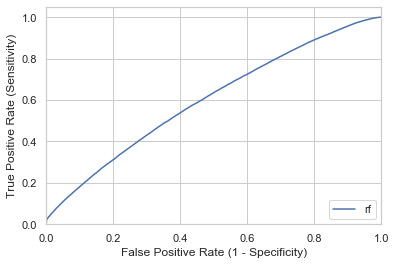

In [184]:
X_feat = data_predict

y = data['PERSONS_TF']

X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .3)


t = mlp = MLPClassifier(hidden_layer_sizes = (200,200,200), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=100)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)

sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [205]:
cardata=cdata.dropna()
cardata

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,MOTORIST_AFFECTED,MOTORIST_TF,CYCLIST_AFFECTED,CYCLIST_TF
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
5,40.636536,-73.914410,3.0,0.0,21.0,21.000000,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1,0.0,0
6,40.774540,-73.919650,0.0,0.0,8.0,8.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670612,40.785171,-73.973134,0.0,0.0,10.0,10.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670613,40.772344,-73.952686,2.0,0.0,21.0,21.333333,1.0,0.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670614,40.768802,-73.958360,0.0,0.0,8.0,8.150000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1670615,40.754348,-73.976972,1.0,0.0,3.0,2.916667,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0


In [206]:
pred = list(zip(cardata['time_num'],cardata['MANHATTAN'],cardata['QUEENS'],cardata['BRONX'],cardata['STATEN ISLAND'],cardata['BROOKLYN'],cardata['Human'],cardata['Environmental'],cardata['Vehicular'],cardata['Unspecified']))
resp = cardata['CYCLIST_TF']
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1101438, 1: 1101438})


In [207]:
cardata_predict = cardata[['time_num','MANHATTAN','QUEENS','BRONX','STATEN ISLAND','BROOKLYN','Human','Environmental','Vehicular','Unspecified']]

In [224]:
X_tot2 = cardata_predict
print("number of features: {0}".format(len(X_tot2.columns)))
y2 = cardata['CYCLIST_TF']

number of features: 10


In [225]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
# n_jobs parameters controls how many CPU cores you want to use; -1 for all
felr = RFECV(LinearRegression(), cv = 3, min_features_to_select = 1, n_jobs = 1)
# fit and automatically prune features
felr.fit(X_tot2, y2)

RFECV(cv=3,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=1, scoring=None, step=1, verbose=0)

In [226]:
print("features:\n{0}\ncoefs:\n{1}\n\navg R^2: {2:.5f}".format(X_tot2.columns[felr.support_], 
                                                         felr.estimator_.coef_, felr.score(X_tot2, y2)))

features:
Index(['time_num', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND', 'BROOKLYN',
       'Human', 'Environmental', 'Vehicular', 'Unspecified'],
      dtype='object')
coefs:
[ 0.00101956  0.00995853 -0.00303341 -0.00345279 -0.01390286  0.01043053
  0.0052558   0.00400603 -0.00805756 -0.00120428]

avg R^2: 0.00442


In [217]:
X_tot3 = cardata_predict
print("number of features: {0}".format(len(X_tot3.columns)))
y3 = cardata['MOTORIST_TF']

number of features: 10


In [218]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
# n_jobs parameters controls how many CPU cores you want to use; -1 for all
felr = RFECV(LinearRegression(), cv = 3, min_features_to_select = 1, n_jobs = 1)
# fit and automatically prune features
felr.fit(X_tot3, y3)

RFECV(cv=3,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=1, scoring=None, step=1, verbose=0)

In [219]:
print("features:\n{0}\ncoefs:\n{1}\n\navg R^2: {2:.5f}".format(X_tot3.columns[felr.support_], 
                                                         felr.estimator_.coef_, felr.score(X_tot3, y3)))

features:
Index(['QUEENS', 'BRONX', 'STATEN ISLAND', 'BROOKLYN', 'Human',
       'Environmental', 'Vehicular', 'Unspecified'],
      dtype='object')
coefs:
[6.91004940e-02 7.02022172e-02 8.41331540e-02 6.73531185e-02
 1.09693137e+09 1.09693137e+09 1.09693137e+09 1.09693137e+09]

avg R^2: 0.01064


In [221]:
X_tot = cardata_predict
print("number of features: {0}".format(len(X_tot.columns)))
y = cardata['PERSONS_TF']

number of features: 10


In [222]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
# n_jobs parameters controls how many CPU cores you want to use; -1 for all
felr = RFECV(LinearRegression(), cv = 3, min_features_to_select = 1, n_jobs = 1)
# fit and automatically prune features
felr.fit(X_tot, y)

RFECV(cv=3,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=1, scoring=None, step=1, verbose=0)

In [223]:
print("features:\n{0}\ncoefs:\n{1}\n\navg R^2: {2:.5f}".format(X_tot3.columns[felr.support_], 
                                                         felr.estimator_.coef_, felr.score(X_tot3, y3)))

features:
Index(['time_num', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND', 'BROOKLYN',
       'Human', 'Environmental', 'Vehicular', 'Unspecified'],
      dtype='object')
coefs:
[ 0.00121596  0.00588667 -0.00475962  0.01068485 -0.01855985  0.00674796
 -0.0005676   0.02931105 -0.03593982  0.00719637]

avg R^2: -0.03338


In [227]:
Xs = cardata_predict
y = cardata['CYCLIST_TF']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [228]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=20)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.11150826
Iteration 2, loss = 0.11021455
Iteration 3, loss = 0.10999318
Iteration 4, loss = 0.10992553
Iteration 5, loss = 0.10989296
Iteration 6, loss = 0.10980032
Iteration 7, loss = 0.10978138
Iteration 8, loss = 0.10972655
Iteration 9, loss = 0.10971184
Iteration 10, loss = 0.10972116
Iteration 11, loss = 0.10969540
Iteration 12, loss = 0.10969834
Iteration 13, loss = 0.10966910
Iteration 14, loss = 0.10965182
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [229]:
print('MLP Scpore: ',mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())

MLP Scpore:  0.9767222313327986
Null accuracy on the test set:  0.023277768667201482


In [230]:
y_pred = mlp.predict(X_test)

print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Sensitivity/Recall (TPR):  0.0
Precision (PPV):  0.0
F1: 0.0
Null accuracy on the test set:  0.023277768667201482
Accuracy is: 0.9767222313327986


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    220371
           1       0.00      0.00      0.00      5252

    accuracy                           0.98    225623
   macro avg       0.49      0.50      0.49    225623
weighted avg       0.95      0.98      0.97    225623



[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

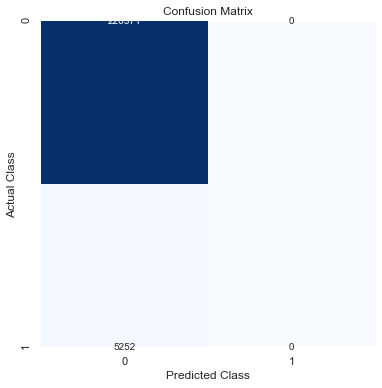

In [231]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

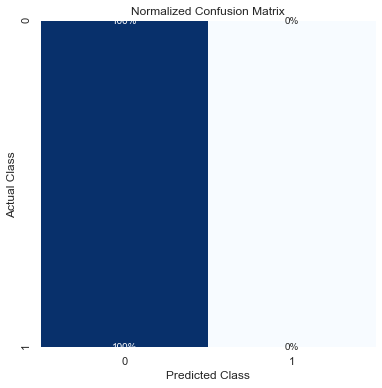

In [232]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

In [234]:
Xs = cardata_predict
y = cardata['MOTORIST_TF']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (500,500,500), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=20)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.34396159
Iteration 2, loss = 0.34217375
Iteration 3, loss = 0.34186977
Iteration 4, loss = 0.34174386
Iteration 5, loss = 0.34168055
Iteration 6, loss = 0.34157002
Iteration 7, loss = 0.34154657
Iteration 8, loss = 0.34148450
Iteration 9, loss = 0.34147221
Iteration 10, loss = 0.34143672
Iteration 11, loss = 0.34137444


In [ ]:
print('MLP Scpore: ',mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())

In [ ]:
y_pred = mlp.predict(X_test)

print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

In [ ]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [ ]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')